In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("../../data/spend.csv")
df.head()

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.00,-11941627.00,-12603779.00,-13080447.90
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.00,-2222626.00,-2199357.00,-2268968.77
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.00,-1768986.00,-1963404.00,-1976738.18
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.00,-2500000.00,-3100342.25,0.00
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841012.69,-866760.77,-1218608.41,-892803.25


In [5]:
agency_mil = df.groupby("Agency").sum()["2018"].sort_values(ascending=False) / 1e6
other = agency_mil[10:].sum()
agency_mil = agency_mil[:10]
agency_mil["other"] = other
agency_mil

Agency
31 -  POLICE                    76.552840
00 -  UNDEFINED                 58.540306
30 -  FIRE                      53.524880
44 -  STREETS                   26.326007
51 -  PARKS                     18.080019
62 -  COMMUNITY DEVELOPMENT     11.203807
17 -  INFORMATION TECHNOLOGY     6.386421
45 -  TRAFFIC ENGINEERING        6.155646
60 -  BUILDING INSPECTION        4.606082
40 -  ENGINEERING                4.551111
other                           24.332017
Name: 2018, dtype: float64

Text(0, 0.5, 'Spending (Million $)')

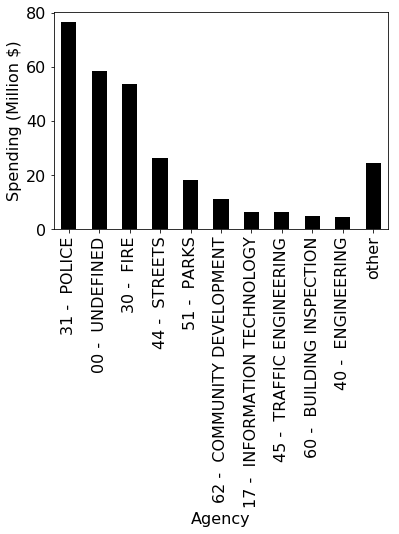

In [15]:
ax = agency_mil.plot.bar(colormap="gray")
ax.set_ylabel("Spending (Million $)")

In [16]:
ax.get_figure().savefig("spend18.eps", bbox_inches="tight")